In [360]:
%matplotlib inline

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder, StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

plt.figure(figsize=(20, 10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [94]:
data = pd.read_csv('../crawler/tgdd_detail.csv')

In [4]:
data.head()

,id,link,title,price,tag,cpu_tech,cpu_type,ram,disk,screen_size,resolution,graphic_card,screen_port,keyboard_light,battery,weight,review_point,review_count,brand
0,204388,https://www.thegioididong.com/laptop/asus-gami...,Asus Gaming ROG Strix G531G i7 9750H (AL017T),27990000,laptop-gaming,intel core i7 coffee lake,9750h,8 gb,ssd 512 gb m.2 pcie,15.6 inch,full hd (1920 x 1080),nvidia® geforce gtx™ 1650 4gb,"hdmi,",có,li - polymer 3 cell,2.4 kg,NaN,NaN,Asus
1,211633,https://www.thegioididong.com/laptop/asus-gami...,Asus Gaming TUF FX505D R7 3750H (AL003T),22490000,laptop-gaming,amd ryzen 7,3750h,8 gb,ssd 512 gb m.2 pcie,15.6 inch,full hd (1920 x 1080),nvidia® geforce gtx™ 1650 4gb,",",có,li-ion 3 cell,2.2 kg,0.0,0.0,Asus
2,208859,https://www.thegioididong.com/laptop/lenovo-id...,Lenovo Ideapad L340 15IRH i5 9300H (81LK00FAVN),18490000,laptop-gaming,intel core i5 coffee lake,9300h,8 gb,hỗ trợ khe cắm ssd m.2 pcie,15.6 inch,full hd (1920 x 1080),"nvidia geforce gtx 1050, 3gb",",",có,li-ion 3 cell,2.15 kg,4.2,5.0,Lenovo
3,217394,https://www.thegioididong.com/laptop/lenovo-id...,Lenovo IdeaPad L340 15IRH i7 9750H (81LK00VUVN),22490000,laptop-gaming,intel core i7 coffee lake,9750h,8 gb,ssd 512 gb m.2 pcie,15.6 inch,full hd (1920 x 1080),"nvidia geforce gtx 1050, 3gb",",",có,li-ion 3 cell,2.062 kg,NaN,NaN,Lenovo
4,210511,https://www.thegioididong.com/laptop/lenovo-id...,Lenovo IdeaPad L340 15IRH i7 9750H (81LK00FBVN),21290000,laptop-gaming,intel core i7 coffee lake,9750h,8 gb,hỗ trợ khe cắm ssd m.2 pcie,15.6 inch,full hd (1920 x 1080),"nvidia geforce gtx 1050, 3gb",",",có,li-ion 3 cell,2.14 kg,NaN,NaN,Lenovo


In [165]:
data_filtered = data.drop(['title', 'link', 'review_count', 'review_point', 'cpu_type', 'screen_port'], axis=1)

data_filtered['ram'] = data['ram']\
    .fillna('0')\
    .apply(lambda r: int(re.sub(r'\D+', '', r)))
data_filtered['cpu_tech'] = data['cpu_tech']\
    .fillna('')\
    .apply(lambda cpu: re.sub(r'intel (\w+)\s?(\w+)?.*', r'intel \1 \2', cpu.lower()))\
    .apply(lambda cpu: re.sub(r'amd (\w+)\s?(\w+)?.*', r'amd \1 \2', cpu.lower()))

data_filtered['keyboard_light'] = data['keyboard_light']\
    .apply(lambda k: 1 if k == 'có' else 0)

data_filtered.head()

,id,price,tag,cpu_tech,ram,disk,screen_size,resolution,graphic_card,keyboard_light,battery,weight,brand
0,204388,27990000,laptop-gaming,intel core i7,8,ssd 512 gb m.2 pcie,15.6 inch,full hd (1920 x 1080),nvidia® geforce gtx™ 1650 4gb,1,li - polymer 3 cell,2.4 kg,Asus
1,211633,22490000,laptop-gaming,amd ryzen 7,8,ssd 512 gb m.2 pcie,15.6 inch,full hd (1920 x 1080),nvidia® geforce gtx™ 1650 4gb,1,li-ion 3 cell,2.2 kg,Asus
2,208859,18490000,laptop-gaming,intel core i5,8,hỗ trợ khe cắm ssd m.2 pcie,15.6 inch,full hd (1920 x 1080),"nvidia geforce gtx 1050, 3gb",1,li-ion 3 cell,2.15 kg,Lenovo
3,217394,22490000,laptop-gaming,intel core i7,8,ssd 512 gb m.2 pcie,15.6 inch,full hd (1920 x 1080),"nvidia geforce gtx 1050, 3gb",1,li-ion 3 cell,2.062 kg,Lenovo
4,210511,21290000,laptop-gaming,intel core i7,8,hỗ trợ khe cắm ssd m.2 pcie,15.6 inch,full hd (1920 x 1080),"nvidia geforce gtx 1050, 3gb",1,li-ion 3 cell,2.14 kg,Lenovo


## preprocess resolution 

In [71]:
data['resolution']

0      full hd (1920 x 1080)
1      full hd (1920 x 1080)
2      full hd (1920 x 1080)
3      full hd (1920 x 1080)
4      full hd (1920 x 1080)
               ...          
247    full hd (1920 x 1080)
248          hd (1366 x 768)
249    full hd (1920 x 1080)
250          hd (1366 x 768)
251    full hd (1920 x 1080)
Name: resolution, Length: 252, dtype: object

In [166]:
def process_resolution(r: str):
    match = re.search(r'(\d+ ?x ?\d+)', r.lower())
    if match:
        return match.group(1)
    return r

data_filtered['resolution'] = data['resolution']\
    .apply(process_resolution)

data_filtered['resolution']

0      1920 x 1080
1      1920 x 1080
2      1920 x 1080
3      1920 x 1080
4      1920 x 1080
          ...     
247    1920 x 1080
248     1366 x 768
249    1920 x 1080
250     1366 x 768
251    1920 x 1080
Name: resolution, Length: 252, dtype: object

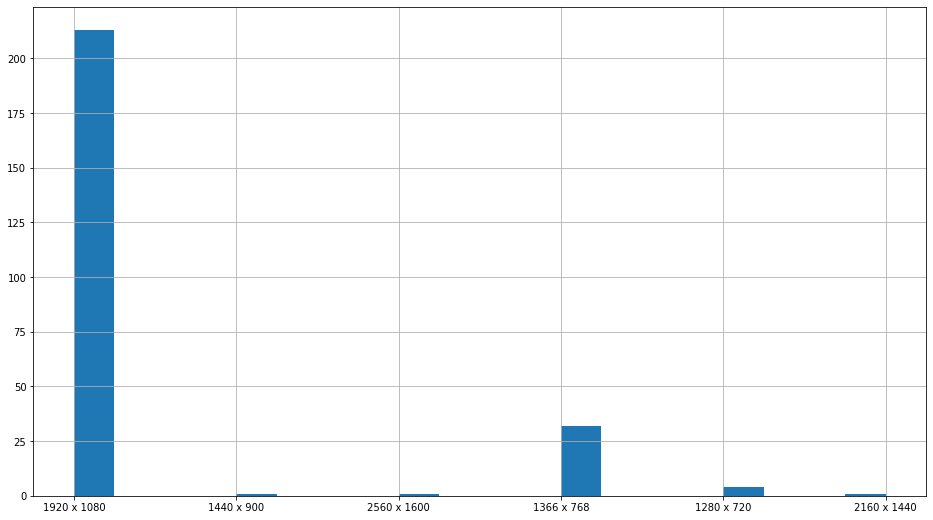

In [128]:
data_filtered['resolution'].hist(bins=20, figsize=(16, 9))
# plt.xticks(rotation=90)

## GET TAGS

In [63]:
tags = data_filtered['tag'].unique()

In [64]:
print(tags)

['laptop-gaming' 'do-hoa-ky-thuat' 'hoc-tap-van-phong']


(array([ 15.,   0.,   0.,   0.,   0.,  49.,   0.,   0.,   0., 188.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

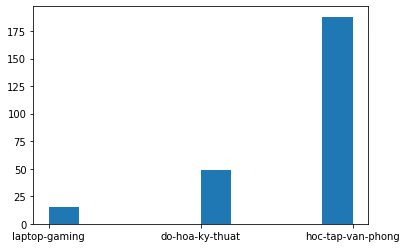

In [333]:
plt.hist(data_filtered['tag'])

## GET SOME INFO EACH COLUMN

In [90]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
id                252 non-null int64
price             252 non-null int64
tag               252 non-null object
cpu_tech          252 non-null object
cpu_type          252 non-null object
ram               252 non-null int64
disk              252 non-null object
screen_size       252 non-null object
resolution        252 non-null object
graphic_card      252 non-null object
screen_port       252 non-null object
keyboard_light    252 non-null object
battery           252 non-null object
weight            252 non-null object
brand             252 non-null object
dtypes: int64(3), object(12)
memory usage: 29.7+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59ccff2c50>,
      dtype=object)

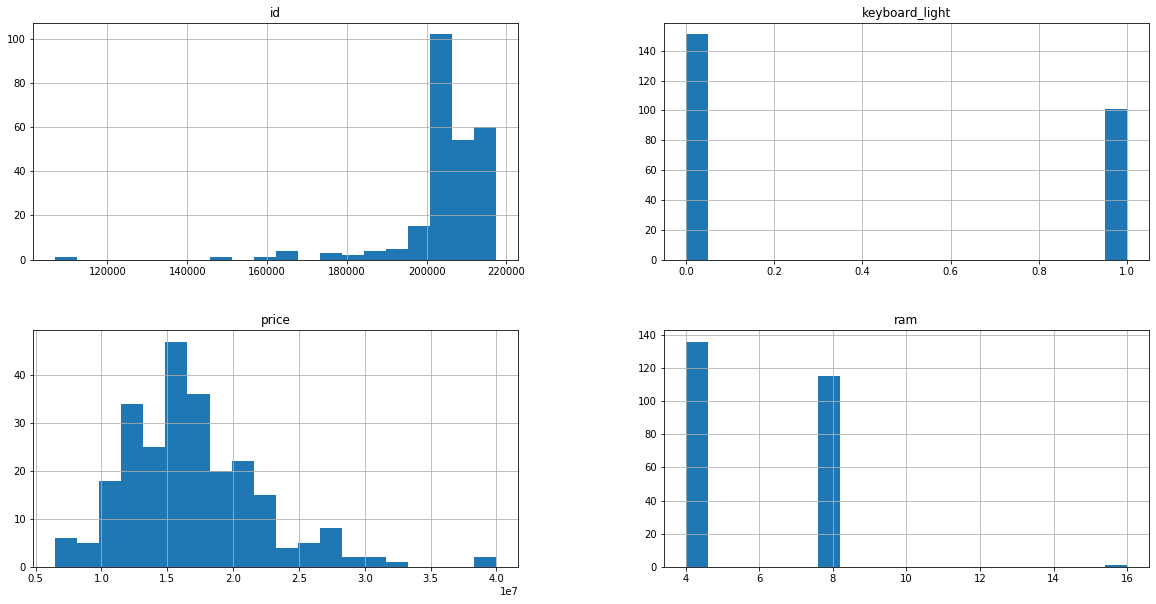

In [129]:
data_filtered.fillna(0)
data_filtered.hist(figsize=(20, 10), bins=20)

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

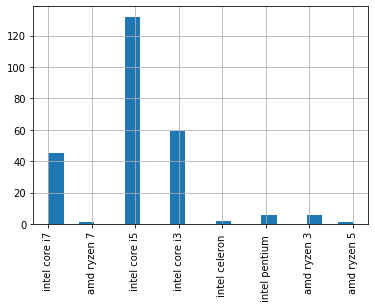

In [92]:
data_filtered['cpu_tech'].hist(bins=20)
plt.xticks(rotation=90)

## JOIN TAGS

In [201]:
print (data_filtered['id'].count())
print (len(data_filtered['id'].unique()))
cols_without_tag = list(data_filtered.columns)
cols_without_tag.remove('tag')
print(cols_without_tag)

252
236
['id', 'price', 'cpu_tech', 'ram', 'disk', 'screen_size', 'resolution', 'graphic_card', 'keyboard_light', 'battery', 'weight', 'brand']


In [348]:
data_filtered_grouped = data_filtered\
    .groupby(cols_without_tag, as_index=False)\
    .agg({'tag': list})\
    .drop(['id', 'price'], axis=1)

In [367]:
# print (data_filtered_grouped['id'].count())
# print (len(data_filtered_grouped['id'].unique()))
# data_filtered_grouped
data_filtered_grouped[data_filtered_grouped['tag'].str.len() > 1].head()

,cpu_tech,ram,disk,screen_size,resolution,graphic_card,keyboard_light,battery,weight,brand,tag
64,intel core i5,8,ssd: 256 gb m.2 sata3,14 inch,1920 x 1080,"nvidia geforce mx150, 2gb",1,li-ion 3 cell,1.4 kg,Asus,"[do-hoa-ky-thuat, hoc-tap-van-phong]"
65,intel core i7,8,intel optane 16gb,15.6 inch,1920 x 1080,"nvidia geforce mx150, 2gb",1,li-ion 3 cell,1.8 kg,Asus,"[do-hoa-ky-thuat, hoc-tap-van-phong]"
85,intel core i7,8,ssd 512 gb m.2 pcie,15.6 inch,1920 x 1080,"nvidia geforce mx150, 2gb",1,li-ion 3 cell,1.8 kg,Asus,"[do-hoa-ky-thuat, hoc-tap-van-phong]"
133,intel core i5,8,ssd 512 gb m.2 pcie,15.6 inch,1920 x 1080,nvidia geforce mx250 2gb,0,li - polymer 2 cell,1.6 kg,Asus,"[do-hoa-ky-thuat, hoc-tap-van-phong]"
138,intel core i7,8,ssd 512 gb m.2 pcie,15.6 inch,1920 x 1080,nvidia geforce mx230 2gb,0,li-ion 2 cell,1.9 kg,Asus,"[do-hoa-ky-thuat, hoc-tap-van-phong]"


# MULTICLASS CLASSIFICATION

In [350]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression, SGDClassifier

In [351]:
binarizer = MultiLabelBinarizer()

X_df = data_filtered_grouped.drop('tag', axis=1)
Y_df = binarizer.fit_transform(data_filtered_grouped.tag)

(X_train, X_test, Y_train, Y_test) = train_test_split(X_df, Y_df)

In [352]:
print(X_train[:5])

          cpu_tech  ram                         disk screen_size   resolution  \
216  intel core i5    4  hỗ trợ khe cắm ssd m.2 pcie     14 inch  1920 x 1080   
10   intel core i5    4                    hdd: 1 tb   15.6 inch  1920 x 1080   
86   intel core i7    8          ssd 256gb nvme pcie   15.6 inch  1920 x 1080   
22   intel core i7    4                    hdd: 1 tb   15.6 inch  1920 x 1080   
35   intel core i7    8          ssd 256gb nvme pcie   13.3 inch  1920 x 1080   

                  graphic_card  keyboard_light         battery   weight brand  
216         intel uhd graphics               0  polymer 3 cell  1.79 kg  Dell  
10   nvidia geforce mx130, 2gb               0   li-ion 4 cell  2.23 kg  Acer  
86         amd radeon 520, 2gb               0   li-ion 3 cell  2.21 kg  Dell  
22   nvidia geforce mx130, 2gb               0   li-ion 3 cell  2.07 kg    HP  
35     intel® uhd graphics 620               1   li-ion 4 cell  1.28 kg    HP  


In [374]:
str_cols = ['cpu_tech', 'disk', 'screen_size', 'resolution', 'graphic_card', 'battery', 'brand', 'weight']
tag_cols = ['tag']
num_cols = ['ram', 'keyboard_light']

str_pipeline = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore'), str_cols),
        remainder='passthrough'
    ),
#     StandardScaler()
)

In [375]:
pipeline = Pipeline([
    ('preprocess', str_pipeline),
    ('ovr', OneVsRestClassifier(estimator=LinearRegression())),
])

In [376]:
algos = [
    LinearRegression(),
    MultinomialNB(),
    SGDClassifier(),
    LinearSVC(),
    PassiveAggressiveClassifier()
]

best_algo = None
best_test_error = float('inf')
test_errs = []
train_errs = []

for algo in algos:
    pipeline.set_params(ovr__estimator=algo)
    pipeline.fit(X_train, Y_train)
    
    Y_pred_train = pipeline.predict(X_train)
    Y_pred_test = pipeline.predict(X_test)
    
    train_err = np.mean(Y_pred_train != Y_train)
    test_err = np.mean(Y_pred_test != Y_test)
    
    train_errs.append(train_err)
    test_errs.append(test_err)
    
    if best_test_error > test_err:
        best_test_error = test_err
        best_algo = algo
        
print(best_test_error)

0.062146892655367235


/home/noobcoder/0_Project/school/DataAnalyst/DACK/.venv/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<BarContainer object of 5 artists>

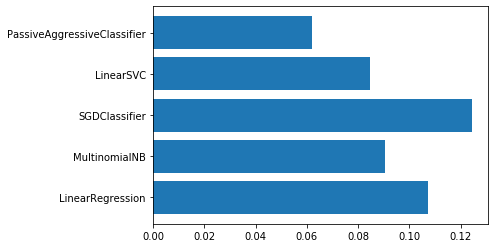

In [377]:
algo_names = list(map(lambda algo: type(algo).__name__, algos))

plt.barh(algo_names, test_errs)

In [378]:
pipeline.set_params(ovr__estimator=best_algo)
result = pipeline.predict(X_df)

[('do-hoa-ky-thuat',), ('hoc-tap-van-phong',), ('hoc-tap-van-phong',), ('hoc-tap-van-phong',), ('do-hoa-ky-thuat', 'hoc-tap-van-phong')]


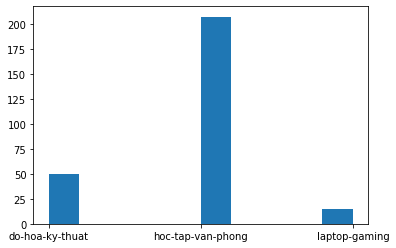

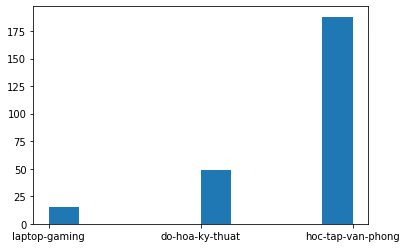

In [397]:
result_label = binarizer.inverse_transform(result)
print(result_label[:5])

plt.hist(np.array([label for item in result_label for label in item]))
plt.show()

plt.hist(data['tag'])
plt.show()